In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('data/diabetes_data_train.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())


# print(df['OCD150'].isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     5069 non-null   float64
 1   Gender                                  5069 non-null   float64
 2   Race                                    5069 non-null   float64
 3   Education                               4837 non-null   float64
 4   status                                  5069 non-null   float64
 5   Smoked at least 100 cigarettes in life  5067 non-null   float64
 6   Height                                  5006 non-null   float64
 7   WaistCircumference                      4822 non-null   float64
 8   BMI                                     4986 non-null   float64
 9   Hypertension                            5069 non-null   float64
 10  Thyroid                                 4829 n

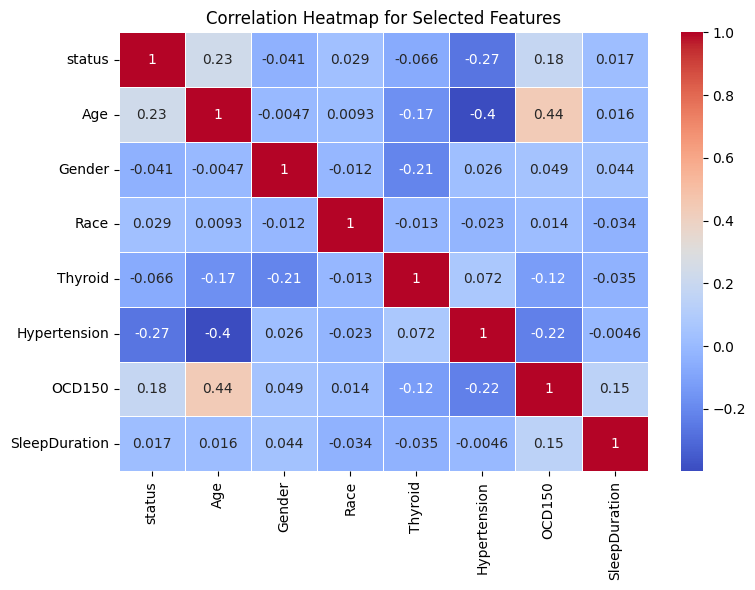

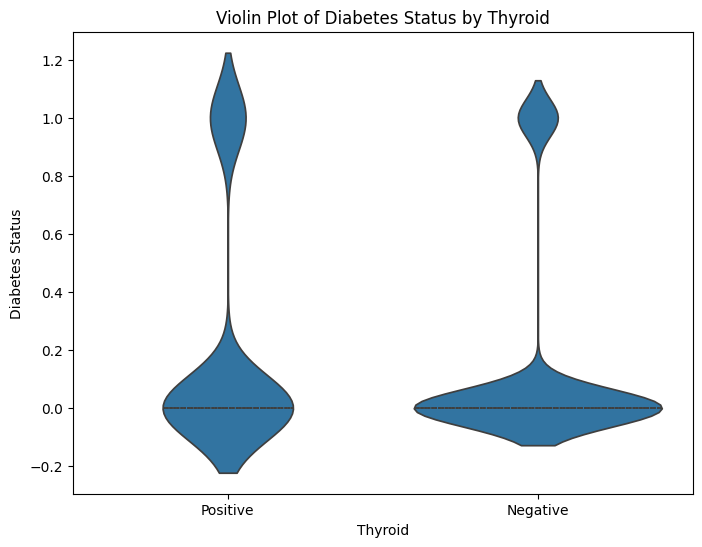

<Figure size 600x400 with 0 Axes>

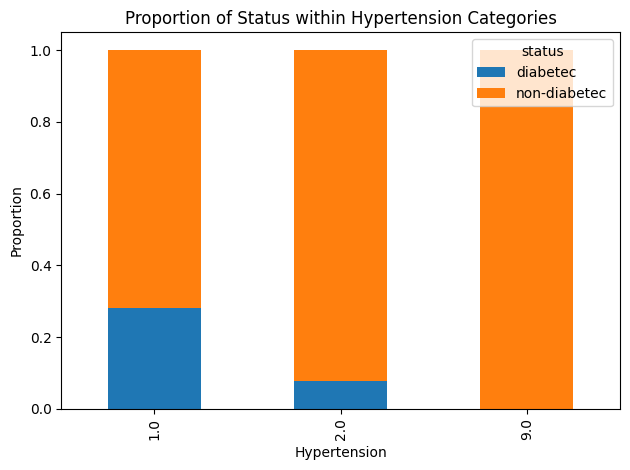

Chi-square test between Status and Hypertension:
Chi-square: 362.52, p-value: 0.0000



<Figure size 600x400 with 0 Axes>

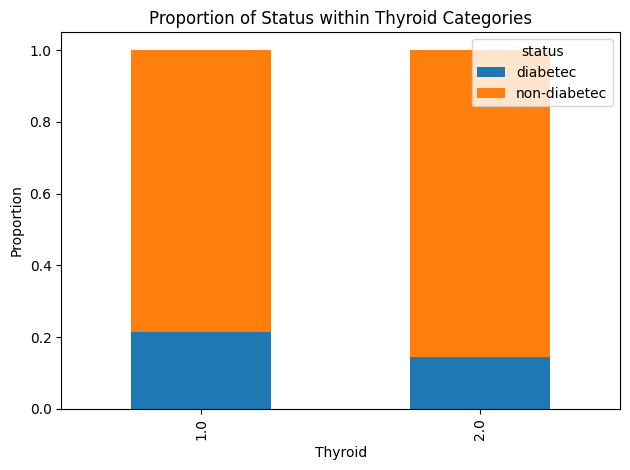

Chi-square test between Status and Thyroid:
Chi-square: 20.63, p-value: 0.0000



<Figure size 600x400 with 0 Axes>

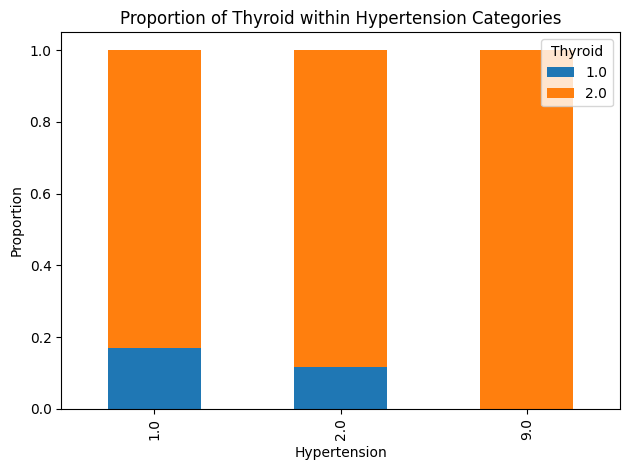

Chi-square test between Hypertension and Thyroid:
Chi-square: 26.10, p-value: 0.0000



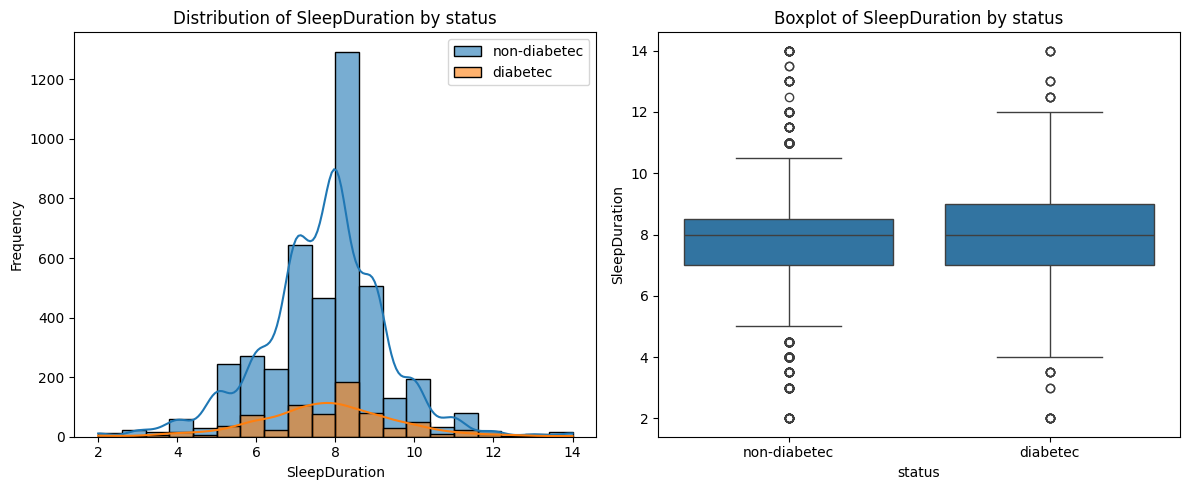


Summary statistics of SleepDuration grouped by status:
         count      mean       std  min  25%  50%  75%   max
status                                                      
0.0     4276.0  7.714687  1.554726  2.0  7.0  8.0  8.5  14.0
1.0      741.0  7.792848  1.841508  2.0  7.0  8.0  9.0  14.0


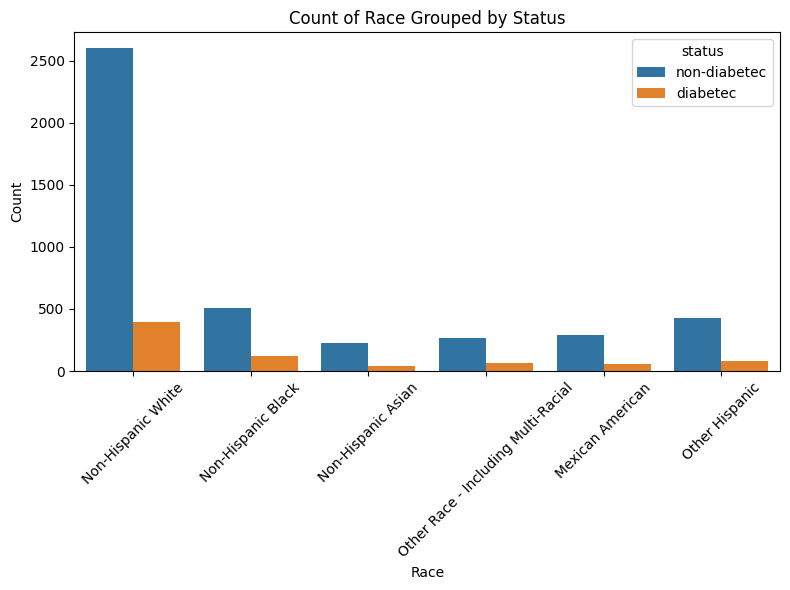

<Figure size 800x600 with 0 Axes>

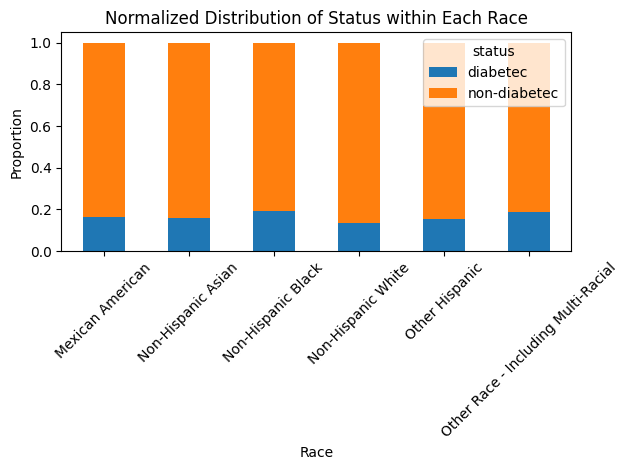


Chi-square test for Race and Status:
Chi-square statistic: 20.14
Degrees of freedom: 5
p-value: 0.0012

Contingency Table (Race vs Status):
status                               diabetec  non-diabetec
Race                                                       
Mexican American                           56           291
Non-Hispanic Asian                         42           226
Non-Hispanic Black                        121           507
Non-Hispanic White                        397          2599
Other Hispanic                             77           426
Other Race - Including Multi-Racial        61           266


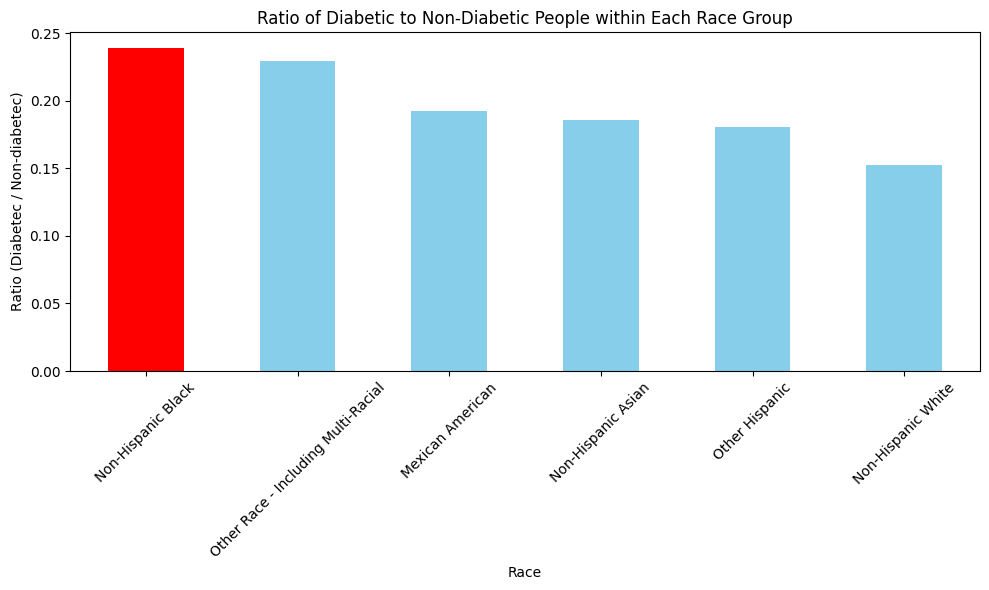

<Figure size 800x600 with 0 Axes>

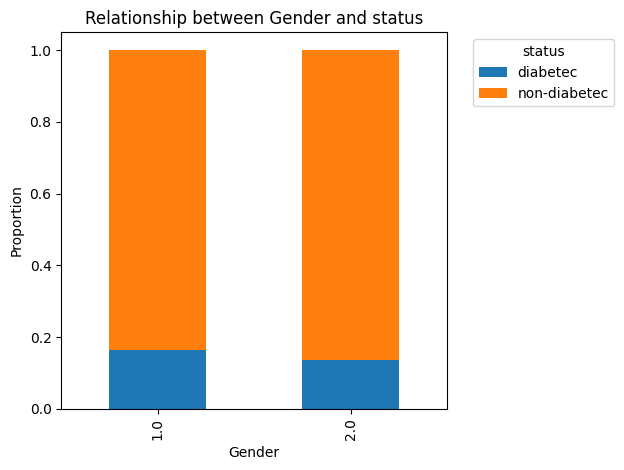


Chi-square test results:
Chi-square statistic: 8.09
p-value: 0.0044


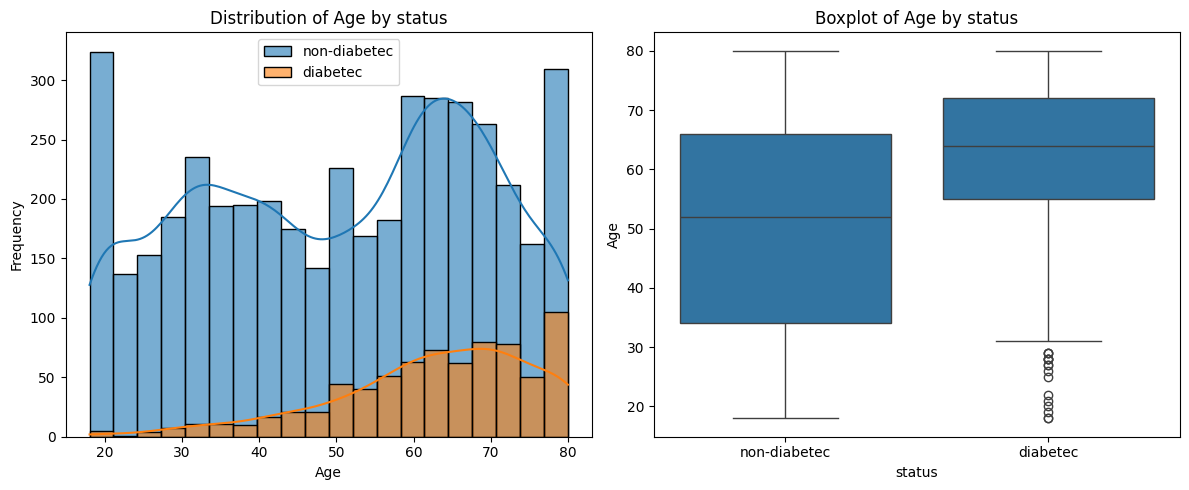


Summary statistics of Age grouped by status:
         count       mean        std   min   25%   50%   75%   max
status                                                            
0.0     4315.0  50.451680  18.507968  18.0  34.0  52.0  66.0  80.0
1.0      754.0  62.505305  13.075452  18.0  55.0  64.0  72.0  80.0


<Figure size 1200x600 with 0 Axes>

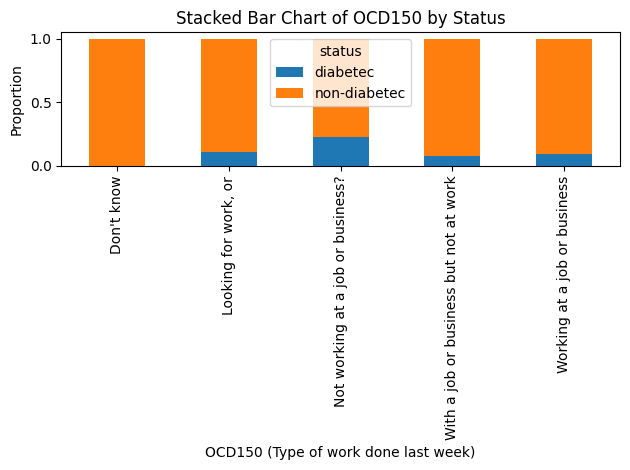

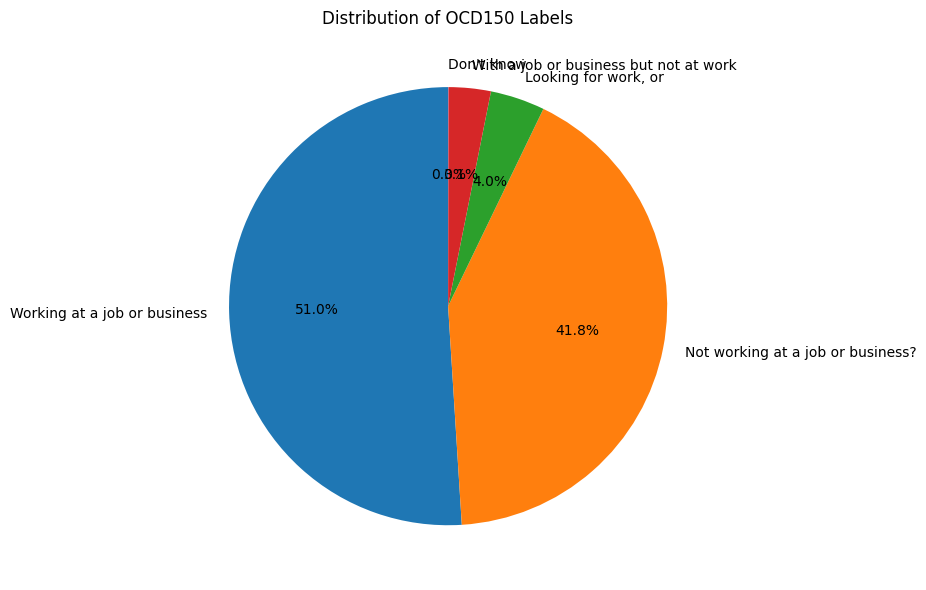

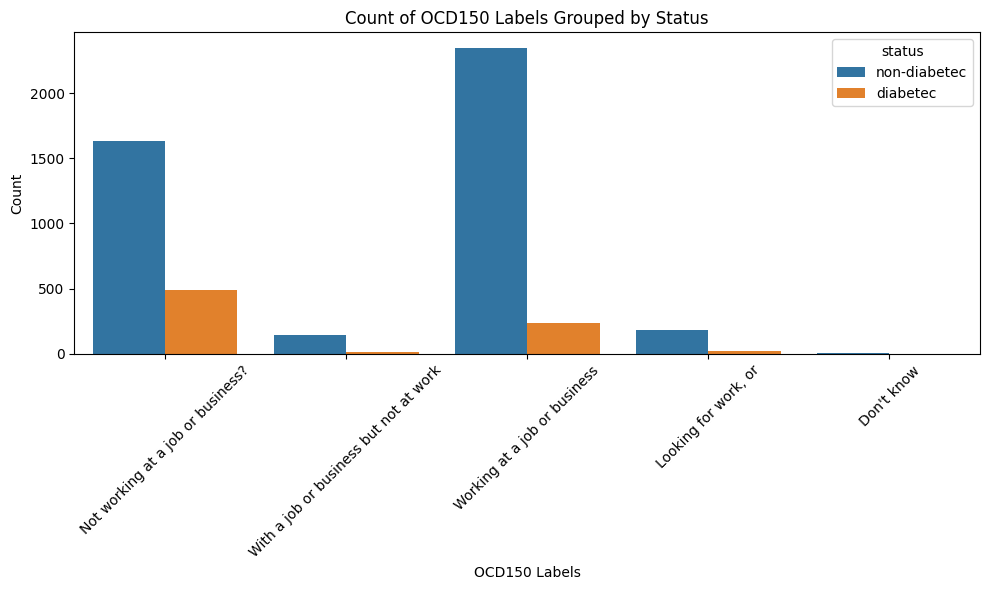


Chi-square test results for OCD150 and status:
Chi-square statistic: 184.58
Degrees of Freedom: 4
p-value: 0.0000

Proportion of diabetec for each OCD150 Label:
OCD150
Don't know                                0.000000
Looking for work, or                      0.107843
Not working at a job or business?         0.228666
With a job or business but not at work    0.082278
Working at a job or business              0.090522
dtype: float64


/tmp/ipykernel_72258/234956953.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prop_diabetec_sorted.values, y=prop_diabetec_sorted.index, palette='viridis')


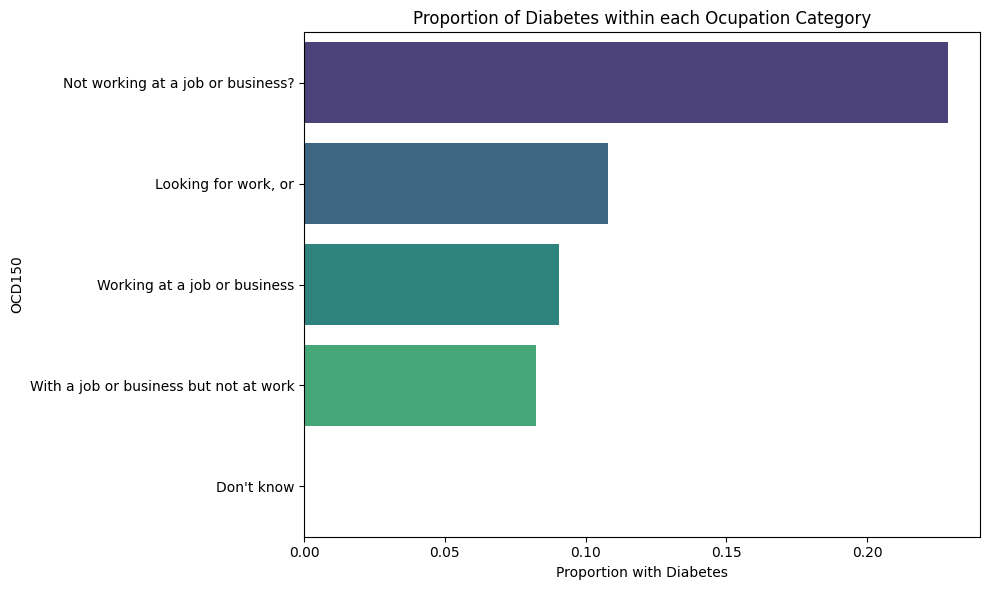

In [11]:
# Dictionary for mapping status values
status_mapping = {1: "diabetec", 0: "non-diabetec"}
import matplotlib.pyplot as plt
# Create correlation heatmap
# For the correlation heatmap, we keep the original numeric columns for calculation.
selected_cols = ['status', 'Age', 'Gender', 'Race', 'Thyroid', 'Hypertension', 'OCD150', 'SleepDuration']
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected Features')
plt.tight_layout()
plt.show()

import scipy
import numpy as np

# Create a crosstab between Gender and status using mapped status for display.
def analyze_categorical(att_1, att_2):
    # Map status column if necessary
    att1_data = df[att_1] if att_1 != 'status' else df[att_1].map(status_mapping)
    att2_data = df[att_2] if att_2 != 'status' else df[att_2].map(status_mapping)
    
    plt.figure(figsize=(8, 6))
    ct = pd.crosstab(att1_data, att2_data, normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.title(f'Relationship between {att_1} and {att_2}')
    plt.xlabel(att_1)
    plt.ylabel('Proportion')
    plt.legend(title=att_2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Also perform Chi-square test with mapped status if needed.
    contingency = pd.crosstab(
        df[att_1] if att_1 != 'status' else df[att_1].map(status_mapping),
        df[att_2] if att_2 != 'status' else df[att_2].map(status_mapping)
    )
    chi2, p_value = scipy.stats.chi2_contingency(contingency)[:2]
    print("\nChi-square test results:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")

def eda_age_status(age_col='Age', status_col='status'):
    # Distribution of Age for each status value.
    plt.figure(figsize=(12, 5))
    
    # Histogram for Age distributions by status with mapped labels.
    plt.subplot(1, 2, 1)
    for s in sorted(df[status_col].unique()):
        subset = df[df[status_col] == s]
        label = status_mapping.get(s, s)
        sns.histplot(subset[age_col], kde=True, bins=20, label=label, alpha=0.6)
    plt.xlabel(age_col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {age_col} by {status_col}')
    plt.legend()
    
    # Boxplot for Age by mapped status.
    plt.subplot(1, 2, 2)
    temp_df = df.copy()
    temp_df['status_map'] = temp_df[status_col].map(status_mapping)
    sns.boxplot(x='status_map', y=age_col, data=temp_df)
    plt.title(f'Boxplot of {age_col} by {status_col}')
    plt.xlabel(status_col)
    plt.ylabel(age_col)
    plt.tight_layout()
    plt.show()
    
    summary_stats = df.groupby(status_col)[age_col].describe()
    print(f"\nSummary statistics of {age_col} grouped by {status_col}:")
    print(summary_stats)

def eda_ocd150_status(status_col='status', ocd_col='OCD150'):
    # Mapping dictionary for OCD150 codes to descriptive labels
    ocd150_mapping = {
        1.0: "Working at a job or business",
        2.0: "With a job or business but not at work",
        3.0: "Looking for work, or",
        4.0: "Not working at a job or business?",
        7.0: "Refused",
        9.0: "Don't know"
    }
    
    # Map the OCD150 values to their descriptive labels and fill missing values
    ocd_labels = df[ocd_col].map(ocd150_mapping).fillna("Missing")
    
    # Create a stacked bar chart with the mapped labels.
    plt.figure(figsize=(12, 6))
    ct = pd.crosstab(ocd_labels, df[status_col].map(status_mapping), normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.title('Stacked Bar Chart of OCD150 by Status')
    plt.xlabel('OCD150 (Type of work done last week)')
    plt.ylabel('Proportion')
    plt.legend(title=status_col)
    plt.tight_layout()
    plt.show()

    # Additional plot 1: Pie chart of the overall distribution of OCD150 labels
    plt.figure(figsize=(8, 6))
    ocd_counts = ocd_labels.value_counts()
    ocd_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of OCD150 Labels')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

    # Additional plot 2: Count plot of OCD150 labels grouped by mapped status.
    plt.figure(figsize=(10, 6))
    sns.countplot(x=ocd_labels, hue=df[status_col].map(status_mapping))
    plt.title('Count of OCD150 Labels Grouped by Status')
    plt.xlabel('OCD150 Labels')
    plt.ylabel('Count')
    plt.legend(title=status_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Create contingency table using descriptive labels and perform chi-square test.
    contingency = pd.crosstab(ocd_labels, df[status_col].map(status_mapping))
    chi2, p_value, dof, expected = scipy.stats.chi2_contingency(contingency)
    
    print("\nChi-square test results for OCD150 and status:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p_value:.4f}")
    
    # Calculate the proportion of diabetec for each OCD150 label.
    diabetes_counts = pd.crosstab(ocd_labels, df[status_col].map(status_mapping))
    diabetes_counts = diabetes_counts.reindex(columns=["non-diabetec", "diabetec"], fill_value=0)
    prop_diabetec = diabetes_counts["diabetec"] / diabetes_counts.sum(axis=1)

    print("\nProportion of diabetec for each OCD150 Label:")
    print(prop_diabetec)

    # New plot: Bar plot showing the proportion of diabetes in each OCD150 category.
    prop_diabetec_sorted = prop_diabetec.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=prop_diabetec_sorted.values, y=prop_diabetec_sorted.index, palette='viridis')
    plt.xlabel('Proportion with Diabetes')
    plt.title('Proportion of Diabetes within each Ocupation Category')
    plt.tight_layout()
    plt.show()

def eda_race_status(race_col='Race', status_col='status'):
    # Define mapping dictionary for Race labels.
    race_mapping = {
         1.0: "Mexican American",
         2.0: "Other Hispanic",
         3.0: "Non-Hispanic White",
         4.0: "Non-Hispanic Black",
         6.0: "Non-Hispanic Asian",
         7.0: "Other Race - Including Multi-Racial"
    }
    
    race_labels = df[race_col].map(race_mapping).fillna("Missing")
    
    plt.figure(figsize=(8, 6))
    sns.countplot(x=race_labels, hue=df[status_col].map(status_mapping))
    plt.title('Count of Race Grouped by Status')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    ct_norm = pd.crosstab(race_labels, df[status_col].map(status_mapping), normalize='index')
    plt.figure(figsize=(8, 6))
    ct_norm.plot(kind='bar', stacked=True)
    plt.title('Normalized Distribution of Status within Each Race')
    plt.xlabel('Race')
    plt.ylabel('Proportion')
    plt.legend(title=status_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    contingency = pd.crosstab(race_labels, df[status_col].map(status_mapping))
    chi2, p_value, dof, expected = scipy.stats.chi2_contingency(contingency)
    print("\nChi-square test for Race and Status:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p_value:.4f}")
    
    print("\nContingency Table (Race vs Status):")
    print(contingency)
    # Calculate the ratio of diabetic (diabetec) to non-diabetic (non-diabetec) people within each Race group.
    diabetes_counts = contingency.reindex(columns=["non-diabetec", "diabetec"], fill_value=0)
    ratio = diabetes_counts["diabetec"] / diabetes_counts["non-diabetec"].replace(0, np.nan)
    ratio_sorted = ratio.sort_values(ascending=False)
    
    # Create a bar plot to display the ratios.
    plt.figure(figsize=(10, 6))
    # Highlight the race with the highest ratio in a different color.
    colors = ['red' if race == ratio_sorted.index[0] else 'skyblue' for race in ratio_sorted.index]
    ratio_sorted.plot(kind='bar', color=colors)
    plt.ylabel('Ratio (Diabetec / Non-diabetec)')
    plt.xlabel('Race')
    plt.title('Ratio of Diabetic to Non-Diabetic People within Each Race Group')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def eda_categorical_trio():
    cols = ['status', 'Hypertension', 'Thyroid']
    df_subset = df[cols].dropna()

    # 1. Relation between Hypertension and mapped status.
    ct_status_hyper = pd.crosstab(df_subset['Hypertension'], df_subset['status'].map(status_mapping))
    plt.figure(figsize=(6, 4))
    (ct_status_hyper.div(ct_status_hyper.sum(axis=1), axis=0)
        .plot(kind='bar', stacked=True))
    plt.title("Proportion of Status within Hypertension Categories")
    plt.xlabel("Hypertension")
    plt.ylabel("Proportion")
    plt.legend(title='status')
    plt.tight_layout()
    plt.show()
    chi2, p, _, _ = scipy.stats.chi2_contingency(ct_status_hyper)
    print("Chi-square test between Status and Hypertension:")
    print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}\n")

    # 2. Relation between Thyroid and mapped status.
    ct_status_thyroid = pd.crosstab(df_subset['Thyroid'], df_subset['status'].map(status_mapping))
    plt.figure(figsize=(6, 4))
    (ct_status_thyroid.div(ct_status_thyroid.sum(axis=1), axis=0)
        .plot(kind='bar', stacked=True))
    plt.title("Proportion of Status within Thyroid Categories")
    plt.xlabel("Thyroid")
    plt.ylabel("Proportion")
    plt.legend(title='status')
    plt.tight_layout()
    plt.show()
    chi2, p, _, _ = scipy.stats.chi2_contingency(ct_status_thyroid)
    print("Chi-square test between Status and Thyroid:")
    print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}\n")

    # 3. Relation between Hypertension and Thyroid.
    ct_hyper_thyroid = pd.crosstab(df_subset['Hypertension'], df_subset['Thyroid'])
    plt.figure(figsize=(6, 4))
    (ct_hyper_thyroid.div(ct_hyper_thyroid.sum(axis=1), axis=0)
        .plot(kind='bar', stacked=True))
    plt.title("Proportion of Thyroid within Hypertension Categories")
    plt.xlabel("Hypertension")
    plt.ylabel("Proportion")
    plt.legend(title='Thyroid')
    plt.tight_layout()
    plt.show()
    chi2, p, _, _ = scipy.stats.chi2_contingency(ct_hyper_thyroid)
    print("Chi-square test between Hypertension and Thyroid:")
    print(f"Chi-square: {chi2:.2f}, p-value: {p:.4f}\n")

def eda_sleep_duration_status(sleep_col='SleepDuration', status_col='status'):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    for s in sorted(df[status_col].unique()):
        subset = df[df[status_col] == s]
        label = status_mapping.get(s, s)
        sns.histplot(subset[sleep_col], kde=True, bins=20, label=label, alpha=0.6)
    plt.xlabel(sleep_col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {sleep_col} by {status_col}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    temp_df = df.copy()
    temp_df['status_map'] = temp_df[status_col].map(status_mapping)
    sns.boxplot(x='status_map', y=sleep_col, data=temp_df)
    plt.xlabel(status_col)
    plt.ylabel(sleep_col)
    plt.title(f'Boxplot of {sleep_col} by {status_col}')
    plt.tight_layout()
    plt.show()
    
    summary_stats = df.groupby(status_col)[sleep_col].describe()
    print(f"\nSummary statistics of {sleep_col} grouped by {status_col}:")
    print(summary_stats)



    # Create a new column to label hypertension status
df['Hypertension_label'] = df['Thyroid'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# Create a violin plot of diabetes status (0: non-diabetec, 1: diabetec) 
plt.figure(figsize=(8, 6))
sns.violinplot(x='Hypertension_label', y='status', data=df, inner='quartile')
plt.xlabel('Thyroid')
plt.ylabel('Diabetes Status')
plt.title('Violin Plot of Diabetes Status by Thyroid')
plt.show()
# Execute deep EDA functions.
eda_categorical_trio()
eda_sleep_duration_status()
eda_race_status()
analyze_categorical('Gender', 'status')
eda_age_status()
eda_ocd150_status()

# Perform chi-square test
